# スクラッチの振り返り
# どう取り組むと効率的だと考えられるか
## 苦労した点
今回苦労したところはC/C++言語とPythonの違いです。C/C++言語での書く場合のアルゴリズムは思い付くが、Pythonではどう表現するのか、が中々思い付かなかった。Pythonの言語仕様を理解が深まり、C/C++言語との違いが分かるに連れ、各言語の利点が見えてきました。<br>
PythonにはPandasがあるため、データの確認が容易に行える。また、Numpyも扱えるため、for文の処理行列計算として扱える。その結果、可読性が向上し、ステップ数も大幅に短く表現できる。しかし、C/C++言語の様なポインタがないため、メモリ消費を意識したコーディングには向かい気がする(Pythonでもメモリ解放等が可能なため向かないとは言えない)。ハードウェアよりの実装するのであれば、Pythonでアルゴリズムを検証したあとで、C/C++言語に移植するのがいいのではと思う。<br>
## 効率向上
効率を向上にはログを表示させる事が一番重要である。今回は途中結果を表示されたくないため、コーディング中にprit文を入れていなかったため、デバックに必要以上の時間を必要とした。改善案として、ログレベルごとに表示させる処理を実装するのが手である(コーディング中)。そうすることにより、デバック中は表示、完成後は表示させないことがログレベルによって可能になる。

# 評価関係
## RecallとPrecisionはどう違うか　F1スコアとは何か
病気の人は全員陽性、元気な人は全員陰性となる検査が理想ですが、実際にはそんなの不可能なので、「どれくらい正しいか」を評価する必要がある。

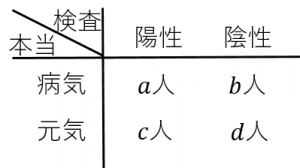

In [1]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/kensa1-300x168.png"))

- $(a+b+c+d)$人に対して検査を行ったところ、図のような結果になった。
- $a$：真陽性（True Positive）
- $b$：偽陰性（False Negative）
- $c$：偽陽性（False Positive）
- $d$：真陰性（True Negative）
- $a$と$d$が多いほど「よい」検査、$b$と$c$が多いほど「悪い」検査。

なお、今回の例ではより一般に、二値分類モデル（検索システムなど）の評価指標として使えますが、ここでは病気の検査」という問題設定で考ええる。

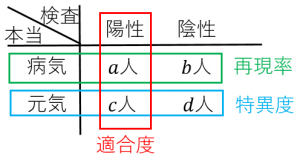

In [2]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/kensa2-300x166.png"))

### 高いほどよい指標
再現率（感度、真陽性率、Recall）<br>
$\dfrac{a}{a+b}$:病気の人の中で検査で発見できる確率 <br>
適合率（精度、陽性反応的中度、Precision）<br>
$\dfrac{a}{a+c}$:検査で陽性が出たときに実際に病気である確率<br>
特異度（真陰性率、Specificity）<br>
$\dfrac{d}{c+d}$:元気な人に対して、病気でないと判断する確率<br>
正確度（Accuracy）<br>
$\dfrac{a+d}{a+b+c+d}$:全体の中で正しく判断される割合<br>
F 値<br>
$\dfrac{:2}{\frac{1}{R}+\frac{1}{P}}=\dfrac{2a}{2a+b+c}$:再現率 R と適合率 P の調和平均（逆数の和の逆数の2倍
### 低いほどよい指標
偽陰性率<br>
$\dfrac{b}{a+b}$:病気の人に対して、検査で見逃してしまう確率<br>
偽陽性率<br>
$\dfrac{c}{c+d}$:病気でない人に対して、検査で病気とみなしてしまう確率<br>
### 再現率と適合率のトレードオフ
たくさん陽性を出す検査（保守的な検査）は再現率は高くなるが、適合率は低くなる。逆に、たくさん陰性を出す検査は適合率は高くなりますが、再現率は低くなる。つまり、再現率と適応度にはトレードオフの関係がある。<br>
このため、再現率と適合度の両方を加味した指標である$F$値がしばしば使用される。

## ROC曲線とは何か
試験の点数から○○大学に合格（T）か不合格（F）かを予測したいときや，検査値から病気（T）か健康（F）かを判断したいときなどがある。要するに，与えられた値から，真（TRUE）か偽（FALSE）かを判断したいわけである。<br>
例として下の表のような場合を考える。
与えられた値をどこで切っても，TとFは完全には分離できない。例えば11で切って，11以上を陽性（positive），11未満を陰性（negative）とした場合，10個のTのうち5個がpositiveに入りますので，true positive（真陽性）の割合は0.5である。また，5個のFのうち1個がpositiveに入りますので，false positive（偽陽性）の割合は0.2である。そこで，(0.2, 0.5) をプロットします。このように，区切る値（閾値，カットオフポイント）をいろいろ変えて，横軸にfalse positiveの割合，縦軸にtrue positiveの割合をとってプロットしたものが，ROC曲線である。<br>
ROCはReceiver Operating Characteristicの略で，第2次大戦のときに米国のレーダーの研究から生まれた概念である。受信者操作特性あるいは受信者動作特性などと訳されることがある（医療方面では受信が受診と書かれることもあります）。

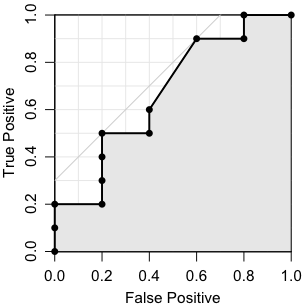

       値  値
0   16.0  T
1   15.0  T
2   14.0  F
3   13.0  T
4   12.0  T
5   11.0  T
6   10.0  F
7    9.0  T
8    8.0  T
9    8.0  T
10   7.0  T
11   6.0  F
12   5.0  F
13   NaN  T
14   NaN  F


In [29]:
import pandas as pd
a = pd.DataFrame([16, 15, 14, 13, 12, 11, 10, 9, 8, 8, 7, 6, 5])
c = pd.DataFrame(["T", "T", "F", "T", "T", "T", "F", "T", "T", "T", "T", "F", "F", "T", "F"])
data = pd.concat((a, c), axis=1)
data.rename(columns={0: "値"})
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/091007a.png"))
print(data.rename(columns={0: "値"}))

## バイアスとバリアンスのトレードオフとは
### バイアス-バリアンス分解とは
実データを用いてモデルをフィッティングした場合には、真のモデルとの間に「バイアス、バリアンス、ノイズ」の3つの要素によってズレが生じる。このズレ具合を評価することで（特にバイアスとバリアンスを比べることで）未学習や過学習などを直感的に理解できるようになる。<br>
式で表すと以下のようになる。<br>
$$E_D[ L(f({\bf x};D),t) ]=E_D[ (y({\bf x};D) -E[t| {\bf x} ;D ])^2 + (E[t| {\bf x};D ] -t)^2]$$
$$=E_D[ (y({\bf x};D) -E[t| {\bf x} ;D ])^2 ] + E_D[ (E[t| {\bf x};D ] -t)^2]$$
と分けることにします。このときの第二項に$E_D[ (E[t| {\bf x};D ] -t)^2]$はノイズ項です。ｌこの項に機械学習で獲得するモデル$y({\bf x};D)$は含まれていない。<br>
このノイズ項は、機械学習の手法でどれだけ頑張っても、改善することのできない項なのである。<br>
$$E_D[ L( y({\bf x};D) ,t) ]$$
$$ = E_D[ \{ (y({\bf x};D)-E_D [y({\bf x};D)] \}^2 ] (バリアンス)$$
$$+E_D [ \{ E_D [y({\bf x};D)] -E[t| {\bf x} ;D ] \}^2 ] (バイアスの（二乗）)$$
$$+E_D[ (E[t| {\bf x};D ] -t)^2] (ノイズ)$$
と分解されることになる。（バイアス-バリアンス分解）
- バリアンス
  $$E_D[ \{ (y({\bf x};D)-E_D [y({\bf x};D)] \}^2 ]$$
  機械学習によるモデル$y({\bf x};D)$による予測が、訓練データ集合によって変動する度合い（の期待値）を表しており、訓練データに依存し過ぎることで新しいデータへの予測が悪化する度合いを表している。
- バイアス
  $$+E_D [ \{ E_D [y({\bf x};D)] -E[t| {\bf x} ;D ] \}^2 ]$$
  機械学習によるモデル$y({\bf x};D)$が、損失の期待値を最小化する$E[t| {\bf x} ;D ]$からずれる度合い（の期待値）を表しており、モデルが単純であるあまりに学習が上手くいかない度合いを表している。
  いわば未学習に対する指標となる。

### バイアスとバリアンスのトレードオフ
バイアスとバリアンスはトレードオフの関係にある。<br>
未学習と過学習の関係を考えれば当たり前ですが、これを定量的に評価できることに意味があると言える。以下の図は、正則化によって過学習制御を行った場合の、バリアンスのバイアスの関係である。

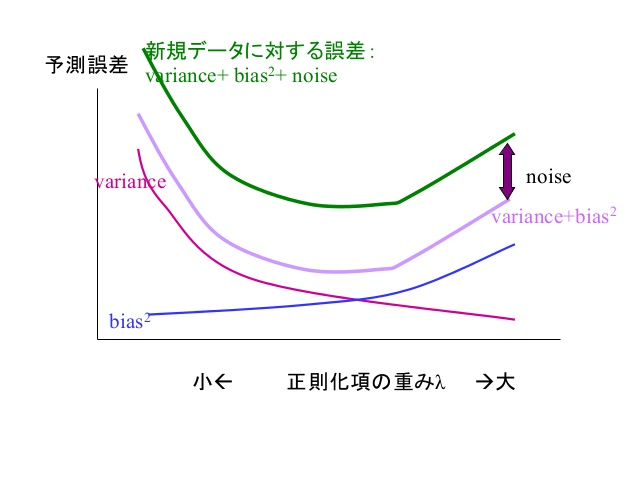

In [31]:
display_png(Image("/home/hiro/デスクトップ/20170124094828.png"))

過学習制御を小さくしておけば、訓練データに対してはフィットするためバイアスは小さくなる。一方で、データに依存しすぎたあまりに生ずるバリアンスは大きくなる。<br>
過学習制御を大きくすれば、訓練データへの依存度であるバリアンスは小さくなるが、訓練データにすらフィッティングできなくなりバイアスが上昇する。<br>
損失の期待値は、バリアンスとバイアス（とノイズ）の和であり、バイアスとバリアンスが両方共なるべく低い位置で正則化を決めることで、新規データに対する誤差も小さくなりうるということである。（バイアスとバリアンスの和と、新規データに対する誤差との差がノイズの項で現れる）<br>
もちろん現実では、データがあまり信頼できないならば、バイアスが少々大きくともバリアンスの減少を優先するなどの方法も考えることができる。<br>

## 過学習を防ぐための方法を3つ
### 正則化(Regularization)
過学習の原因は、特定の学習データに最適になるように学習し過ぎたため、未知のデータに対する誤差（汎化誤差）が逆に上がってしまうことである。<br>
これを防止するための正則化とは、一言でいえば「極端だと思われる意見は聞かないようにする」ということである。つまり、モデルを複雑にする重みにはその量に応じたペナルティを与えて、モデルが複雑にならないようにすることである。<br>
正則化は、一般に次の２つが用いられており、この2つを組み合わせる場合もある。<br>
- L1ノルム正則化(Lasso回帰)：極端なデータの重みを0にする
- L2ノルム正則化(Ridge回帰)：極端なデータの重みを0に近づける
### ドロップアウト(Drop out)
ドロップアウトは、下の図のように「ランダムにノードを非活性にして学習する」処理です。回帰曲線で言えば、全プロットをもとに線を引く代わりに、ある程度間引いたプロットに対して回帰線を求めるようなイメージである。<br>
ドロップアウトの原理は学習のたびにランダムに非活性化されるノードが選ばれるので、実態は同じなのに毎回違う重みづけがなされる。普通の（全ノード活性化）状態で200回学習すると過学習となる場合でも、毎回ランダムにノード状態を変えて200回学習して、その結果を総合するアンサンブル学習にすれば、汎化性能が高まって過学習にならない。 

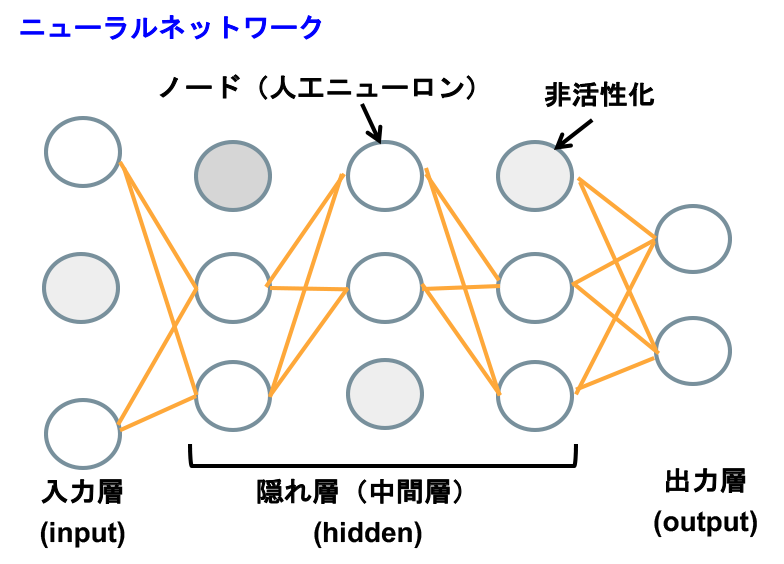

In [35]:
display_png(Image("/home/hiro/デスクトップ/8-2.png"))

### K分割交差検証  (K-fold cross-validation)
下図は学習データが12000ある場合にK=5としたときの交差検証である。K=5なので学習データのうち訓練に使うデータ(10,000）を5分割して、1回目は最初の4つを学習データに、残り1つを評価データに使う。2回目の学習では４番目のデータを評価データにという具合に役割を変えて全部で５回学習する。そして、５回の学習結果の平均を取ったものが、訓練における認識率となる。 

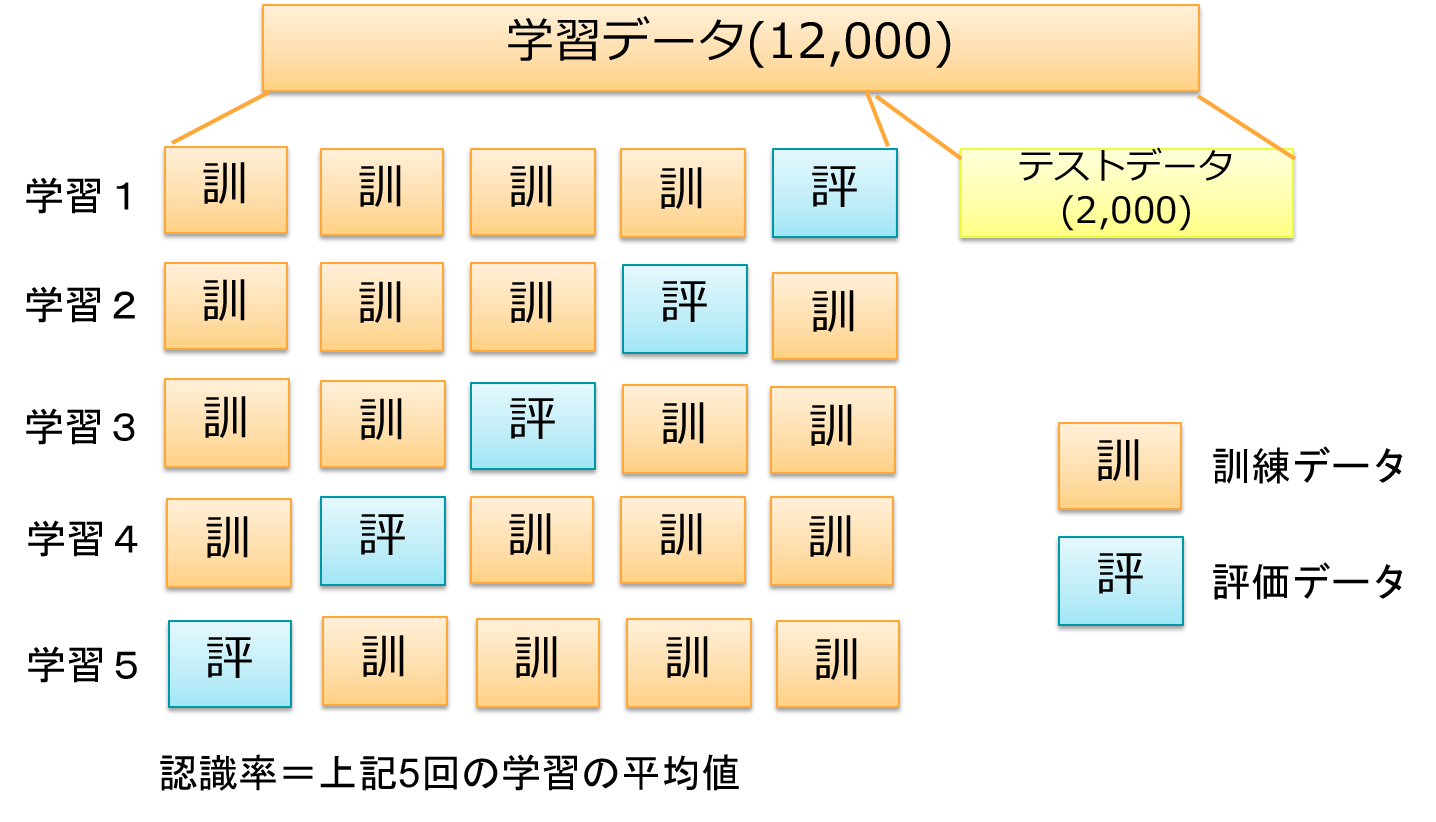

In [36]:
display_png(Image("/home/hiro/デスクトップ/8-3.png"))

## モデルの汎用性を確認する方法は何か
モデルの汎用性を確認する方法は上記のK分割交差検証がある。内容は上記と同様のため、割愛。

# 手法関係
## 機械学習とは何か
機械学習とは一言で言えばパターン認識である。予め用意されたデータ(学習データ)に対して予測するデータがどれだけ似ているかを判断する手法である。そのため、学習データから予測値との関係がある特徴量を見つけ出す事が重要となる。
## 機械学習では何ができるのか
上記でも述べたように機械学習はパターン認識であると言える。そのため、学習データから特徴量を探し出し、入力データがどのデータに分類できるのか、もしくは今後どうなるかといった未来の予測にも使用できる。

## 手法によって異なるのはどういった部分か
一つは解く問題にある。機械学習には与えられた学習データから未知のデータを予測する回帰問題とどのグループに属するかを解く分類問題がある。どの問題を解くかによって手法を変える必要がある。<br>
もう一つは得意するデータの分布が異なることである。同じ分類問題に対応した手法であっても、手法により結果が異なる。それは、手法によって得意とするデータが異なるからである。詳細は以下に説明する。<br>

## 線形回帰が適しているデータや状況は何か
予測データが回帰問題の場合適している。回帰とは、株価分析のように、連続するデータの予測を行うときなどに使用される。主に数値を扱うときである。例えば、そのデータの特徴量の傾向をみて(座標上に線を書いて)、具体的な数字を出す（線上から割り出す）、予測するのが回帰である。

## 手法による得意な分布の違い

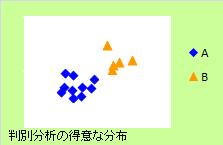

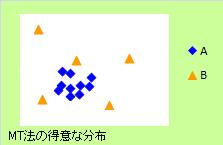

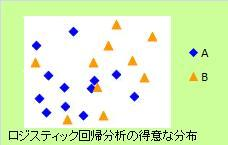

In [37]:
display_png(Image("/home/hiro/デスクトップ/mt1-j.png"))
display_png(Image("/home/hiro/デスクトップ/mt2-j.png"))
display_png(Image("/home/hiro/デスクトップ/mt3-j.png"))

### ロジスティック回帰
ロジスティック回帰分析では、2つのデータ群は、だいたい分かれますが、集まってはいない。また、正規分布の仮定がない。<br>
ロジスティック回帰分析は、「だいたい」というのを、確率を使って数値で表現でる。<br>
例えば、ほとんどの領域でＡの発生率が０で、一部の領域で最大で発生率が0.1になるような分布をしている場合、 パターン認識では、判別結果はすべてBになる。 多くの手法は、それ以上はわからないが、ロジスティック回帰分析では、低い確率では発生する事を扱える。
### SVM
判別分析に適した分布は、 サポートベクターマシン にも適している。 しかも、正規分布していなくても大丈夫である。<br>
ロジスティック回帰分析との違いは、片方のデータ群の表れ方が0.5以上の領域(マージン)がないと、エラーになることがある。
### 決定木
決定木は、３つの図のどれに対しても、不適当ということはない。 そういう意味で、データの特徴的な部分をざっくりと見ておきたい時に向いている。<br>
ただ、階層構造を使ってモデルを作るので、階層構造で説明する必要のないデータについては、 上記の３つの手法を使った方が結果の解釈が楽である。
### K-means
K-meansは上記の手法と大きく違う点は教師なしであることである。正解ラベルがないため、与えられたデータから決められたクラスタ数で分割したい場合に有効である。ただし、各クラスタが丸くないものに関しては正しく分類できないことがある。

# これ以外にどのような機械学習手法があるか簡潔にまとめる
- 決定木<br>
　 - ランダムフォレスト（決定木 × バギング)

    - 概要： 決定木を大量に生成し、各決定木の結果を集計して予測する手法。各決定木は独立しており、説明変数からのサンプリングまたは学習  
    - データからのサンプリングによって、異なる特性を持つように学習する。汎化性能が高く、処理の並列性も高いので人気のある手法である。
    - 予測対象: 連続値(回帰木の場合)、分類
    - 可読性： △（説明変数毎の採用量などから、重要度等の指標はわかる)
    - 並列処理： ○
    - 過学習防止策： 決定木の過学習防止策、決定木の本数を増やすなど 
    <br>
  - 勾配ブースティング木（決定木 × ブースティング)

    - 概要： 決定木を大量に生成し、各決定木の結果を集計して予測する手法。決定木を逐次的に増やしていき、生成済みの決定木が間違えてしまうケースのラベルを更新して、新たな決定木を生成していくイメージです。XGBoostという高速なライブラリが出現し、精度が非常に高く計算時間も実用的な時間に収まるようになり、最も人気な手法である。
    - 予測対象: 連続値(回帰木の場合)、分類
    - 可読性： △（説明変数毎の採用量などから、重要度等の指標はわかる)
    - 並列処理： ○
    - 過学習防止策： 決定木の過学習防止策、決定木の本数を減らす（ブースティングを早めに止める)
